In [ ]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.9.1


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os 
os.chdir("/content/drive/MyDrive/AI/dataset/churn_modeling")

In [8]:
!ls

Churn_Modelling.csv


In [9]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
#feature engineering
geography = pd.get_dummies(X['Geography'], drop_first =True)

In [14]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
X_train.shape

(8000, 11)

In [47]:
## lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [48]:
from tensorflow.keras.layers import Dropout

In [49]:
#Initialize the ANN
classifier = Sequential()

In [50]:
#adding input layer
classifier.add(Dense(units=11,activation = 'ReLU'))

In [66]:
classifier.add(Dense(units=7, activation = 'ReLU'))
#classifier.add(Dropout(0.2))

In [52]:
classifier.add(Dense(units=6, activation = 'ReLU'))

In [53]:
#output layer
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [54]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [56]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [57]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50) #callbacks=early_stopping)

Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4977 - accuracy: 0.7947 - val_loss: 0.4585 - val_accuracy: 0.7978
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4316 - accuracy: 0.8082 - val_loss: 0.4285 - val_accuracy: 0.8095
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4122 - accuracy: 0.8194 - val_loss: 0.4141 - val_accuracy: 0.8167
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3955 - accuracy: 0.8283 - val_loss: 0.4008 - val_accuracy: 0.8254
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3818 - accuracy: 0.8362 - val_loss: 0.3914 - val_accuracy: 0.8273
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3708 - accuracy: 0.8429 - val_loss: 0.3836 - val_accuracy: 0.8342
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3615 - accuracy: 0.8474 - val_loss: 0.3847 - val_accuracy: 0.8357
Epoch 

In [58]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


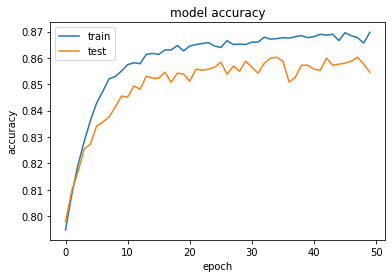

In [59]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

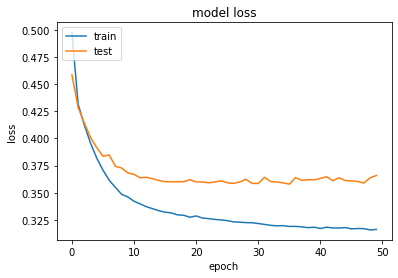

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 194,  211]])

In [63]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [64]:
score

0.861

In [65]:
##get weights
classifier.get_weights()

[array([[-0.48057246, -0.17404427, -0.00354161, -0.10628258, -0.01407825,
          0.17174931, -0.17833635,  0.353387  , -0.18418188, -0.09746253,
         -0.24403776],
        [-0.38450533,  1.0311867 ,  0.66451526, -0.46171662, -0.7786376 ,
         -0.22218272, -0.4233148 , -0.9021513 ,  0.12216944, -0.02204944,
          0.8842015 ],
        [ 0.22898059, -0.18491338, -0.06369604, -0.40308747,  0.31890196,
          0.06736831,  0.21939826,  0.18723126, -0.41515812,  0.0173399 ,
         -0.17449139],
        [ 0.14781083, -0.16316429,  0.32241789, -0.21686028, -0.18595934,
         -0.9234183 ,  1.0708705 ,  0.42134172,  0.16688779, -0.14262903,
          0.08090277],
        [-0.10662005, -0.220815  ,  1.2238162 ,  0.41637075,  1.5691962 ,
          0.5637089 ,  0.11159586, -0.34562325, -0.23296846,  0.64013225,
         -0.39350846],
        [-0.2301636 , -0.0372877 ,  0.09606244,  0.2199273 , -0.06425484,
         -0.03064917, -0.09665795,  0.12460601, -0.13231497, -0.1782109